In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
sales=pd.read_csv("/content/train.csv",index_col=0)

In [107]:
sales.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [108]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


# Missing values

In [109]:
sales.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [110]:
sales.shape

(9800, 17)

In [111]:
sales.dropna(axis=0, inplace=True)

In [112]:
sales.shape

(9789, 17)

In [113]:
sales.duplicated().sum()

1

In [114]:
sales = sales.drop_duplicates()
sales.duplicated().sum()

0

In [115]:
sales.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [116]:
sales.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [117]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d/%m/%Y')
sales['Order Date']

Row ID
1      2017-11-08
2      2017-11-08
3      2017-06-12
4      2016-10-11
5      2016-10-11
          ...    
9796   2017-05-21
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
9800   2016-01-12
Name: Order Date, Length: 9788, dtype: datetime64[ns]

In [118]:
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format='%d/%m/%Y')
sales['Ship Date']

Row ID
1      2017-11-11
2      2017-11-11
3      2017-06-16
4      2016-10-18
5      2016-10-18
          ...    
9796   2017-05-28
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
9800   2016-01-17
Name: Ship Date, Length: 9788, dtype: datetime64[ns]

In [119]:
sales['Days to Ship'] = (sales['Ship Date'] - sales['Order Date']).dt.days
sales['Days to Ship']

Row ID
1       3
2       3
3       4
4       7
5       7
       ..
9796    7
9797    5
9798    5
9799    5
9800    5
Name: Days to Ship, Length: 9788, dtype: int64

In [120]:
sales.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Days to Ship              int64
dtype: object

##DATA VISUALIZATION

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

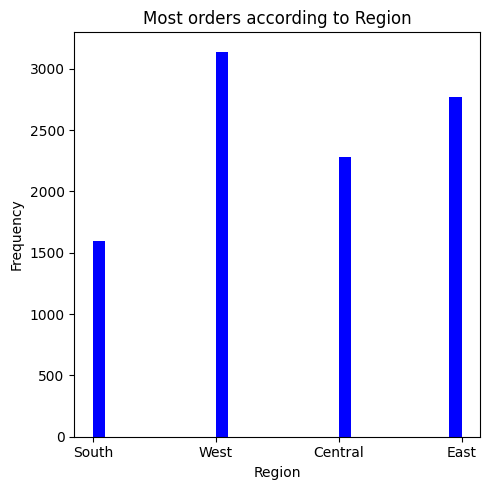

In [122]:
plt.figure(figsize=(5,5))
plt.hist(sales['Region'], bins=30, color='blue')
plt.title('Most orders according to Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.tight_layout()

* Time series Plot

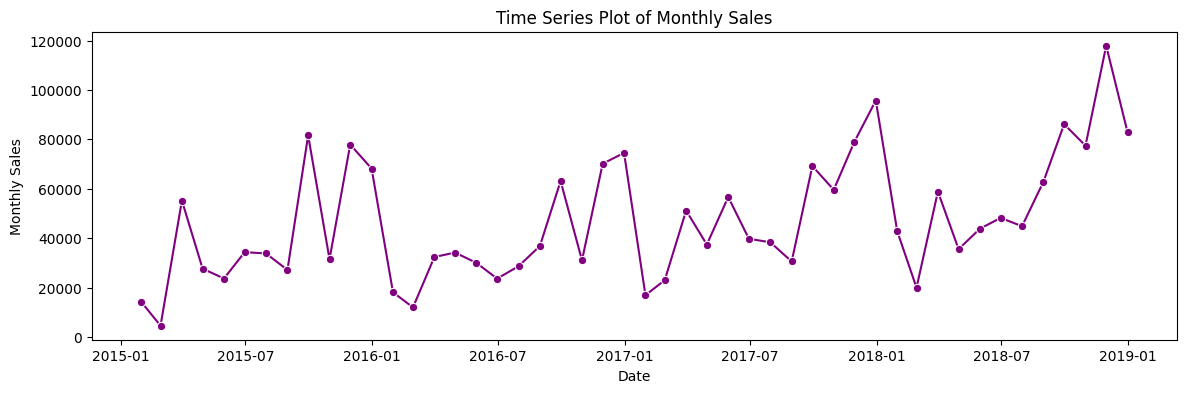

In [123]:
plt.figure(figsize=(14, 4))

sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y')

time_series_sales = sales.resample('M', on='Order Date')['Sales'].sum().reset_index()

sns.lineplot(data=time_series_sales, x='Order Date', y='Sales', marker='o', color='purple')
plt.title('Time Series Plot of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.show()

* Box Plot

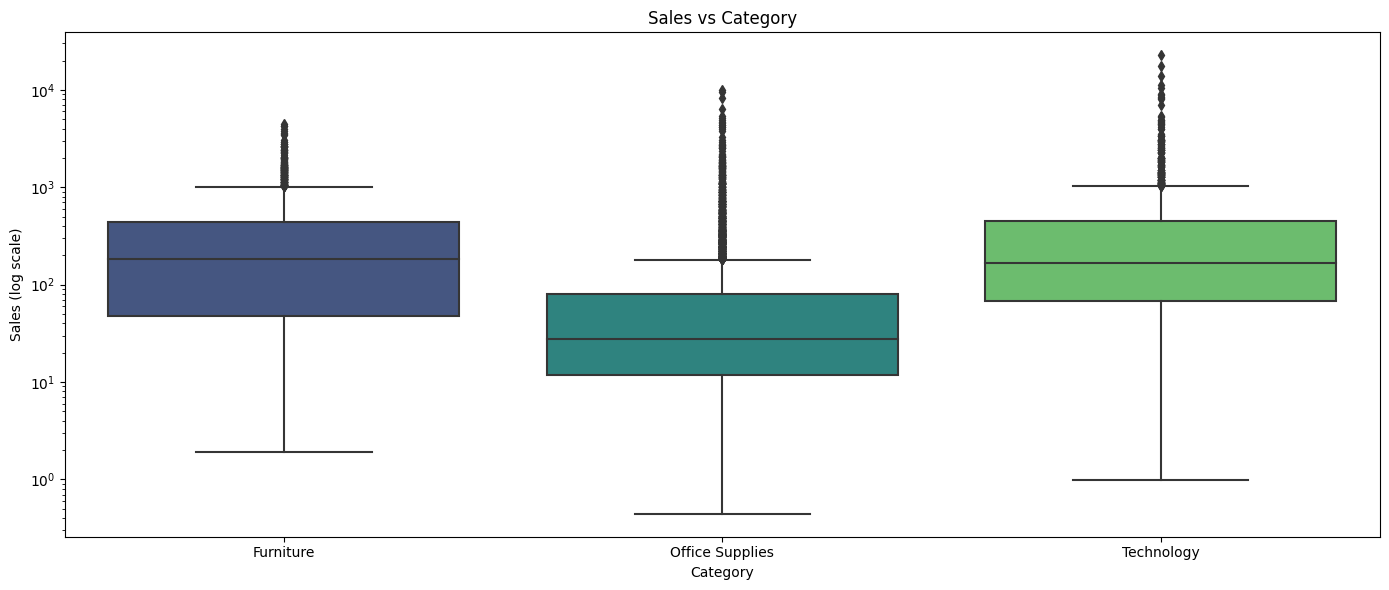

In [124]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Category', y='Sales', data=sales, palette='viridis')
plt.yscale('log')
plt.title('Sales vs Category')
plt.xlabel('Category')
plt.ylabel('Sales (log scale)')
plt.tight_layout()
plt.show()

* Sales Distribution by Category

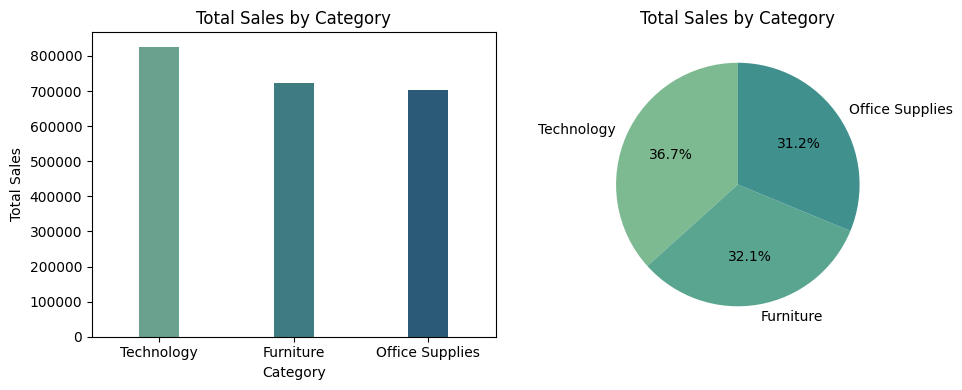

In [125]:
category_sales = sales.groupby('Category')['Sales'].sum().reset_index()

category_sales = category_sales.sort_values(by='Sales', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x='Category', y='Sales', data=category_sales, palette='crest', ax=axes[0], order=category_sales['Category'], width=0.3)
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')

axes[1].pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', colors=sns.color_palette('crest'), startangle=90)
axes[1].set_title('Total Sales by Category')

plt.tight_layout()
plt.show()

## Bivariate Analysis :

* Correlation Analysis:

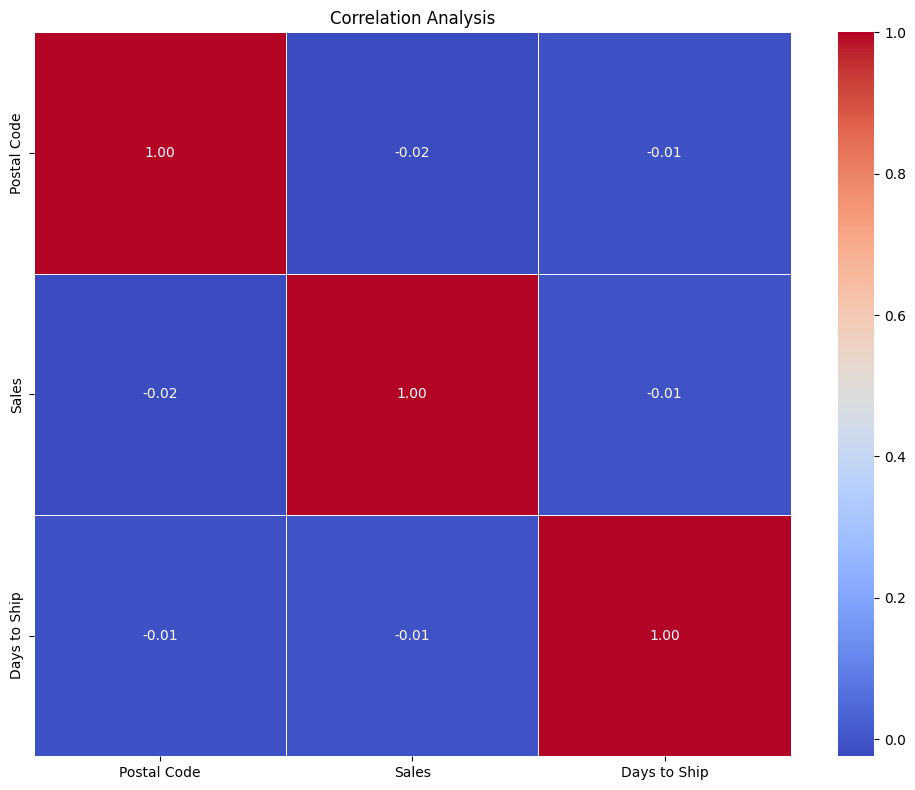

In [126]:
numeric_columns = sales.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Analysis')
plt.tight_layout()
plt.show()

* Scatter Plots :

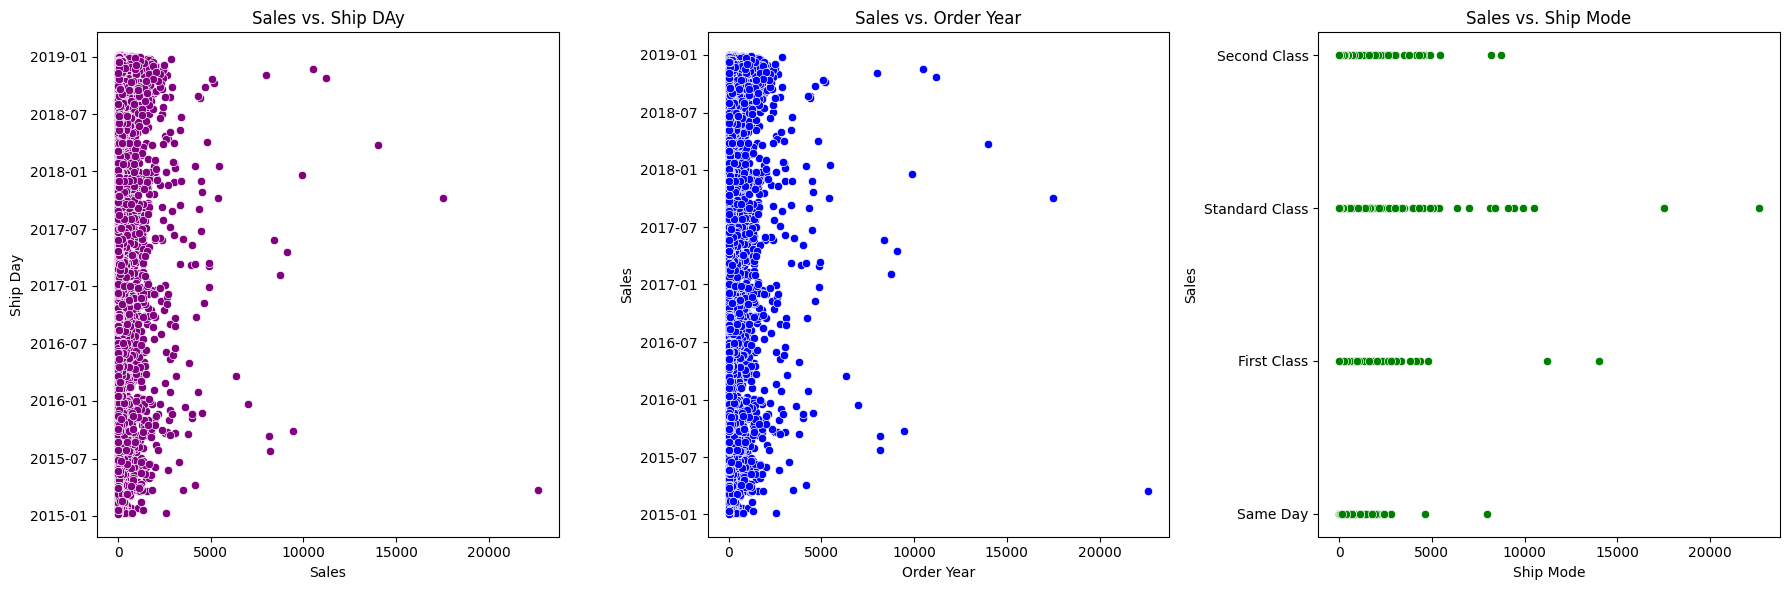

In [127]:
plt.figure(figsize=(18, 6))
# Scatter Plot: Sales vs. Ship Day
plt.subplot(1, 3, 1)
sns.scatterplot(x='Sales', y='Ship Date', data=sales, color='purple')
plt.title('Sales vs. Ship DAy')
plt.xlabel('Sales')
plt.ylabel('Ship Day')

# Scatter Plot: Sales vs. Order Date
plt.subplot(1, 3, 2)
sns.scatterplot(x='Sales', y='Order Date', data=sales, color='blue')
plt.title('Sales vs. Order Year')
plt.xlabel('Order Year')
plt.ylabel('Sales')

# Scatter Plot: Sales vs. Ship Mode
plt.subplot(1, 3, 3)
sns.scatterplot(x='Sales', y='Ship Mode', data=sales, color='green')
plt.title('Sales vs. Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

* Pair Plots:

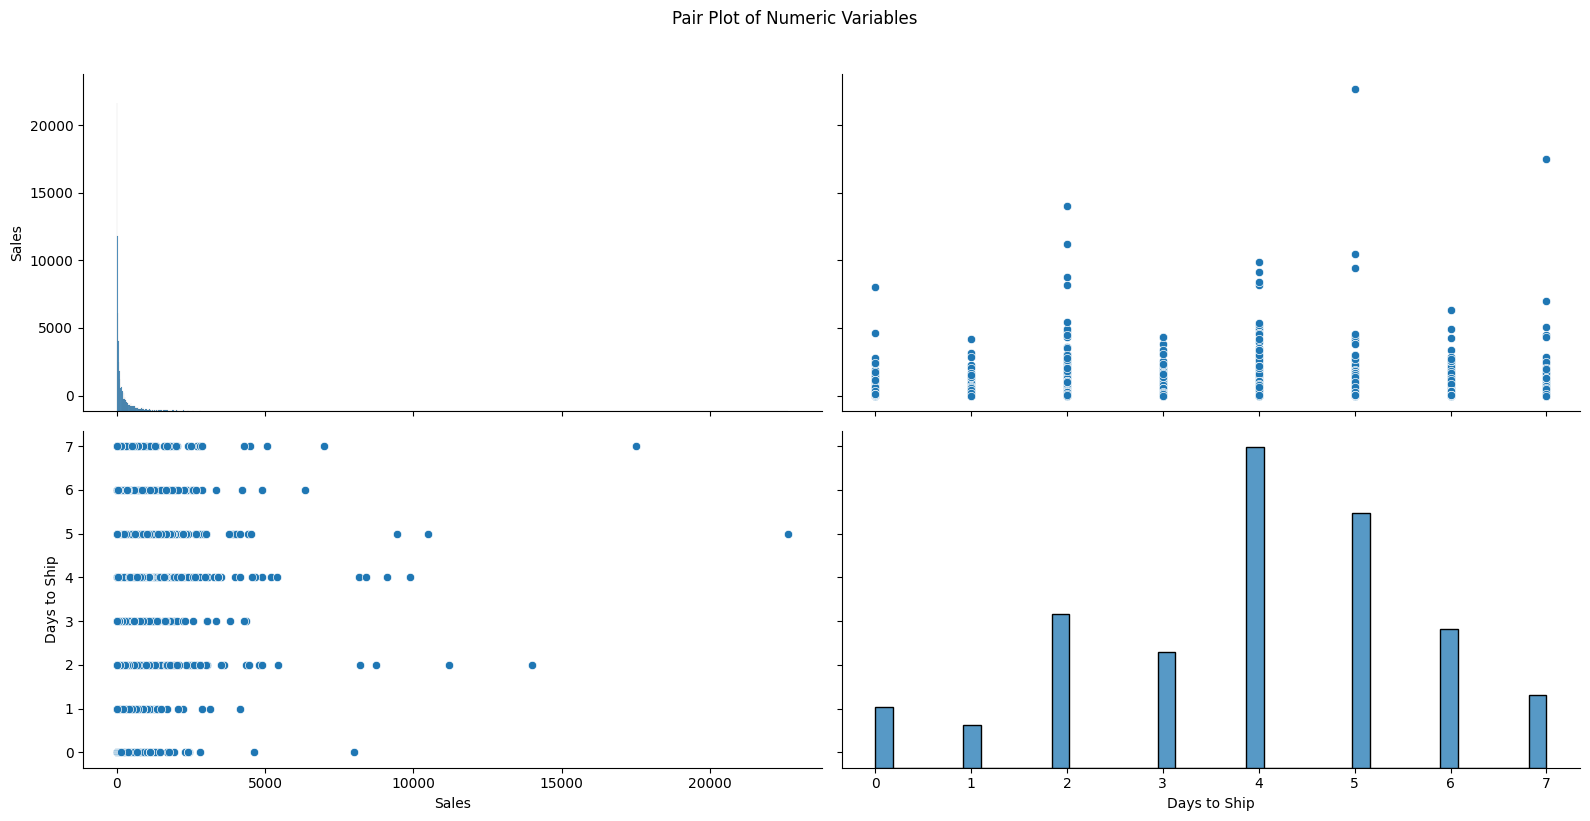

In [128]:
numeric_columns = ['Sales', 'Days to Ship']
sns.pairplot(sales[numeric_columns], height=4, aspect=2)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()

* Heatmaps

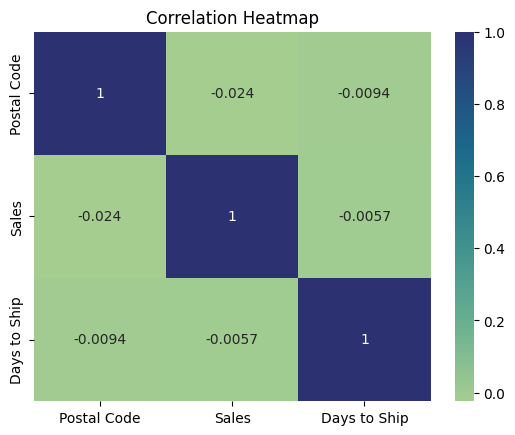

In [129]:
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

* Sales by Region:

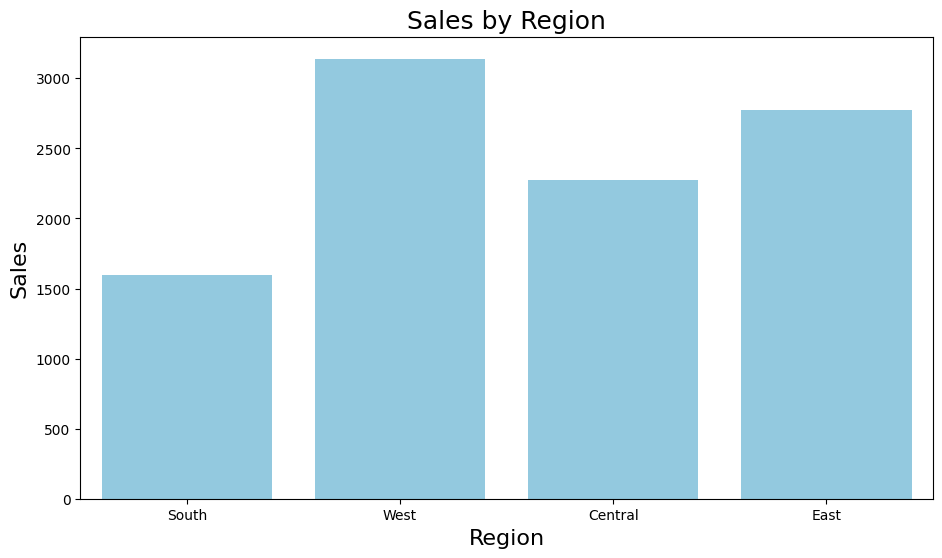

In [130]:
plt.figure(figsize=(11,6))
sns.countplot(data=sales, x='Region',color='Skyblue')
plt.title('Sales by Region', fontsize=18)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Sales',fontsize=16);

* Sales by Region:

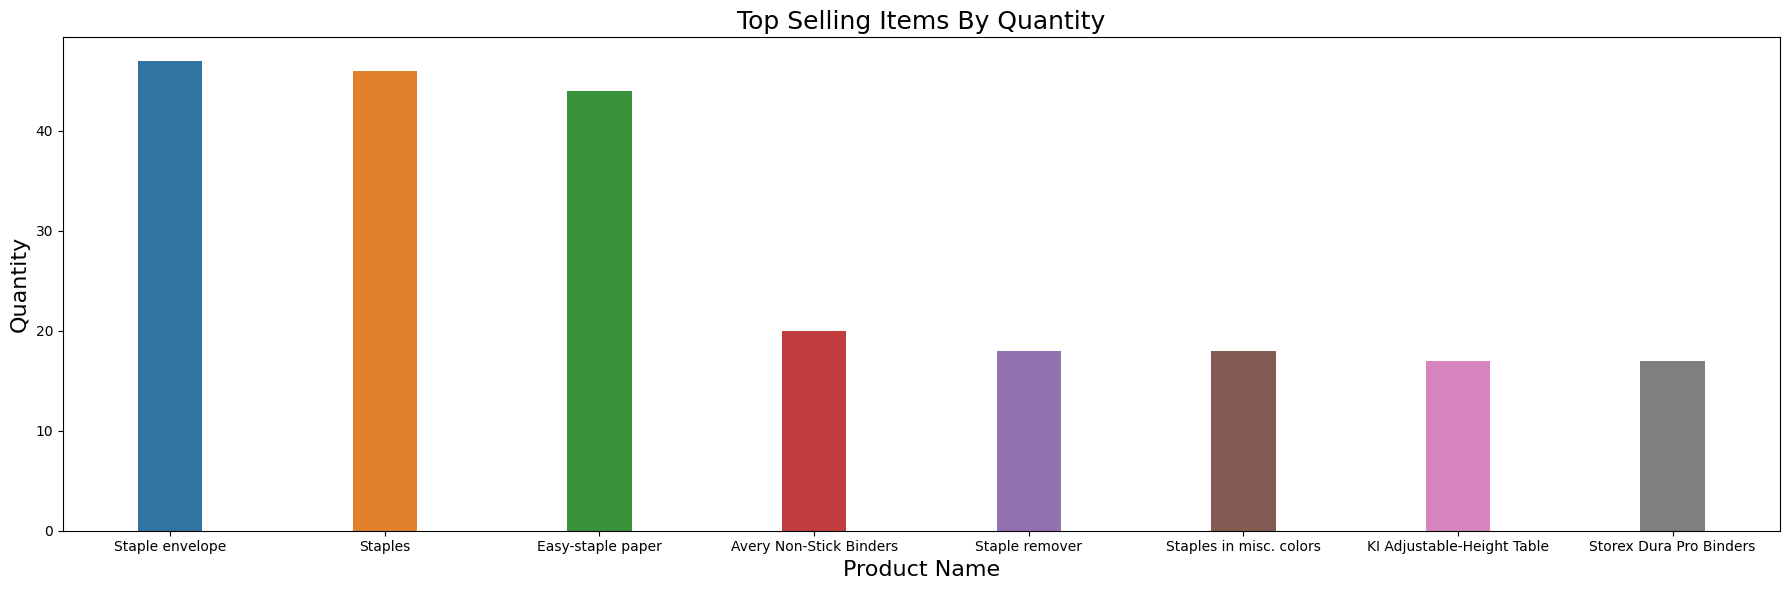

In [131]:
top_products = sales['Product Name'].value_counts().nlargest(8).index

plt.figure(figsize=(18, 6))
sns.countplot(x='Product Name', data=sales[sales['Product Name'].isin(top_products)], order=top_products,  width=0.3)
plt.title('Top Selling Items By Quantity',fontsize=18)
plt.xlabel('Product Name',fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.tight_layout()
plt.show()

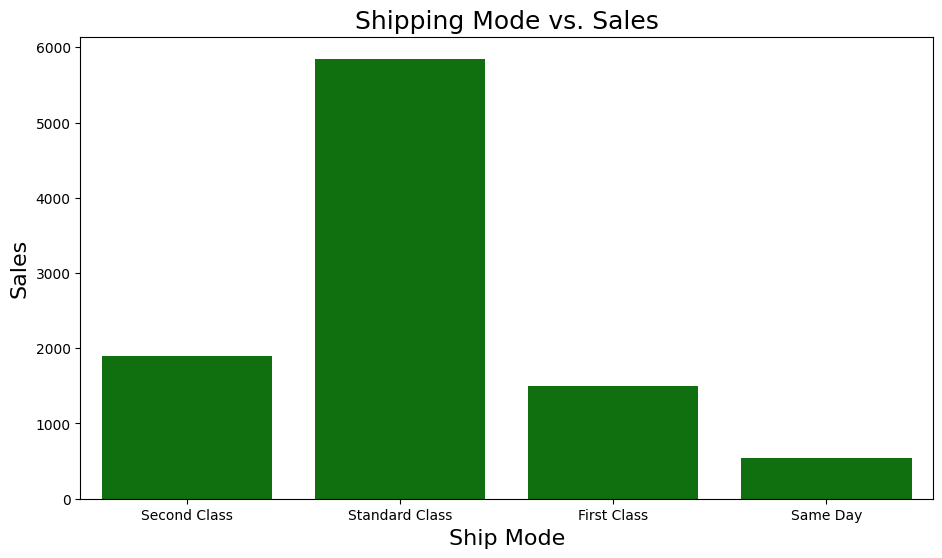

In [132]:
plt.figure(figsize=(11,6))
sns.countplot(data=sales, x='Ship Mode',color='Green')
plt.title('Shipping Mode vs. Sales', fontsize=18)
plt.xlabel('Ship Mode', fontsize=16)
plt.ylabel('Sales',fontsize=16);

* Product-wise Sales Analysis

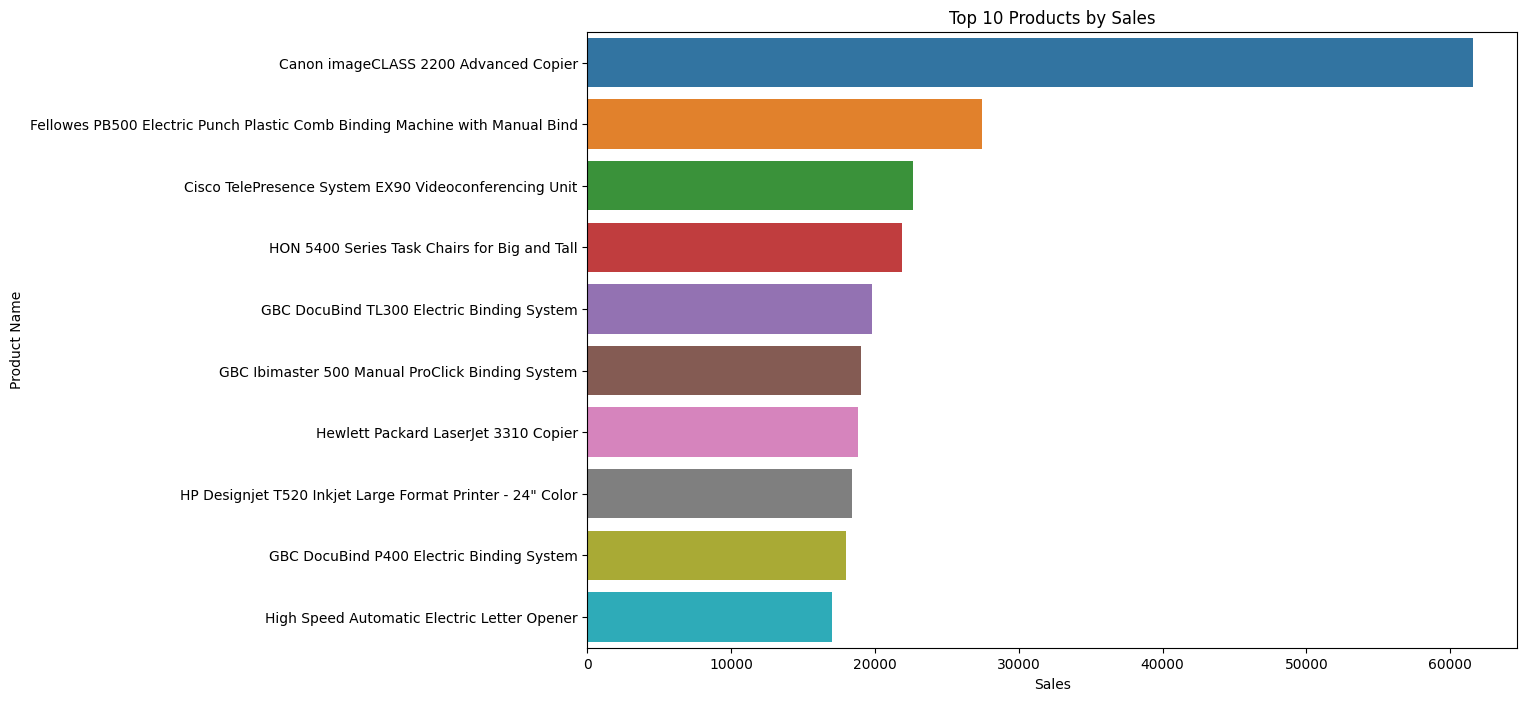

In [133]:
top_products = sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(y='Product Name', x='Sales', data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

* Sales by Segment

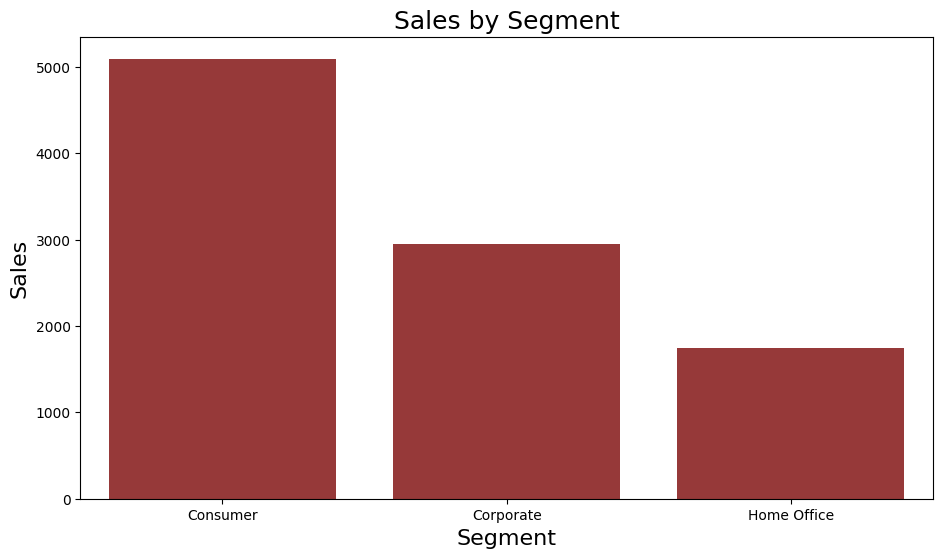

In [134]:
plt.figure(figsize=(11,6))
sns.countplot(data=sales, x='Segment',color='Brown')
plt.title('Sales by Segment', fontsize=18)
plt.xlabel('Segment', fontsize=16)
plt.ylabel('Sales',fontsize=16);